In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
models=["bert-large-uncased","distilbert-base-uncased","bert-base-cased","bert-base-uncased","bert-large-cased" ]
reulst=[]

In [3]:
def get_data(path):
    print(path)
    path+="/*/test_pred_raw*"
    files=[filename for filename in glob.iglob(path, recursive=True)]
    print(files)

    accu_list=[]
    f1_score_list=[]
    for file in files:
        arr=np.load(file)
        accu_list.append(arr['accu_list'])
        f1_score_list.append(arr['f1_score_list'])
    std_f1=np.std(f1_score_list, axis=0)
    mean_f1=np.mean(f1_score_list, axis=0)
    std_acc=np.std(accu_list, axis=0)
    mean_acc=np.mean(accu_list, axis=0)
    title=files[0][-55:-23]
    return title, mean_f1,std_f1,mean_acc,std_acc

In [4]:
[filename for filename in glob.iglob("Old_runs/saved_data/*/*/*", recursive=True)]

['Old_runs/saved_data/bert-large-uncased/lvl1/100T_20e',
 'Old_runs/saved_data/bert-large-uncased/lvl1/050T_10e',
 'Old_runs/saved_data/bert-large-uncased/lvl1/512T_05e',
 'Old_runs/saved_data/bert-large-uncased/lvl1/300T_10e',
 'Old_runs/saved_data/bert-large-uncased/lvl1/200T_10e',
 'Old_runs/saved_data/bert-large-uncased/lvl1/300T_05e',
 'Old_runs/saved_data/bert-large-uncased/lvl1/100T_10e',
 'Old_runs/saved_data/distilbert-base-uncased/lvl1/300T_20e',
 'Old_runs/saved_data/distilbert-base-uncased/lvl1/512T_20e',
 'Old_runs/saved_data/bert-base-cased/lvl1/100T_10e',
 'Old_runs/saved_data/bert-base-uncased/lvl1/100T_20e',
 'Old_runs/saved_data/bert-base-uncased/lvl1/512T_05e',
 'Old_runs/saved_data/bert-base-uncased/lvl1/100T_05e',
 'Old_runs/saved_data/bert-base-uncased/lvl1/300T_05e']

In [5]:
reults=[get_data(filename) for filename in glob.iglob('Old_runs/saved_data/*/*/*', recursive=True)]

Old_runs/saved_data/bert-large-uncased/lvl1/100T_20e
['Old_runs/saved_data/bert-large-uncased/lvl1/100T_20e/Run1/test_pred_raw.npz', 'Old_runs/saved_data/bert-large-uncased/lvl1/100T_20e/Run3/test_pred_raw.npz', 'Old_runs/saved_data/bert-large-uncased/lvl1/100T_20e/Run2/test_pred_raw.npz']
Old_runs/saved_data/bert-large-uncased/lvl1/050T_10e
['Old_runs/saved_data/bert-large-uncased/lvl1/050T_10e/Run1/test_pred_raw.npz', 'Old_runs/saved_data/bert-large-uncased/lvl1/050T_10e/Run2/test_pred_raw.npz']
Old_runs/saved_data/bert-large-uncased/lvl1/512T_05e
['Old_runs/saved_data/bert-large-uncased/lvl1/512T_05e/Run1/test_pred_raw.npz', 'Old_runs/saved_data/bert-large-uncased/lvl1/512T_05e/Run2/test_pred_raw.npz']
Old_runs/saved_data/bert-large-uncased/lvl1/300T_10e
['Old_runs/saved_data/bert-large-uncased/lvl1/300T_10e/Run1/test_pred_raw.npz', 'Old_runs/saved_data/bert-large-uncased/lvl1/300T_10e/Run2/test_pred_raw.npz']
Old_runs/saved_data/bert-large-uncased/lvl1/200T_10e
['Old_runs/saved_dat

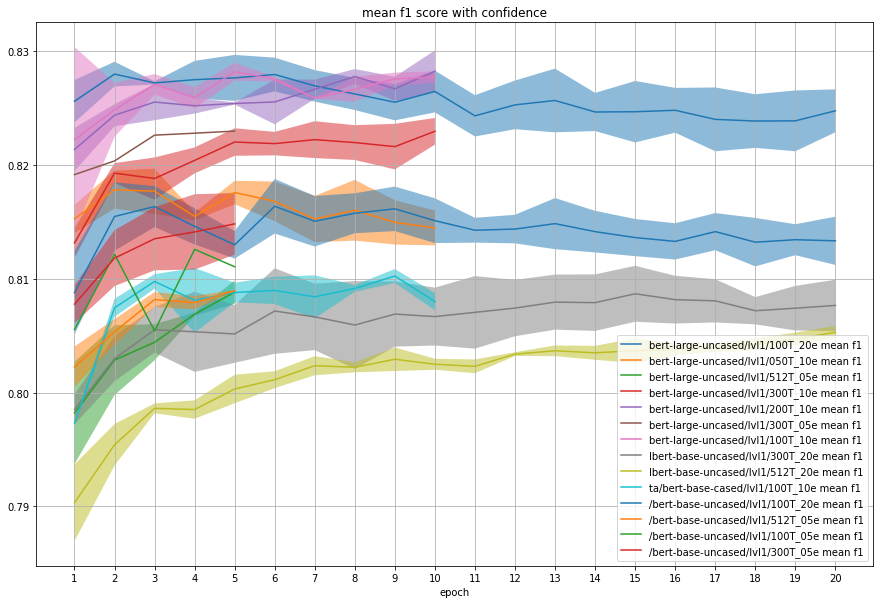

In [130]:
fig=plt.figure(figsize=(15,10))

for res in reults:
    x=range(1,len(res[1])+1)
    plt.plot(x,res[1], label="{} mean f1".format(res[0]))
    plt.fill_between(x, res[1]-res[2], res[1]+res[2], alpha=0.5)
plt.xlabel("epoch")
plt.legend()
plt.grid()
plt.xticks(range(1,21))
plt.title("mean f1 score with confidence")
plt.savefig('./visualizations/f1_graph.png', dpi=fig.dpi)

plt.show()

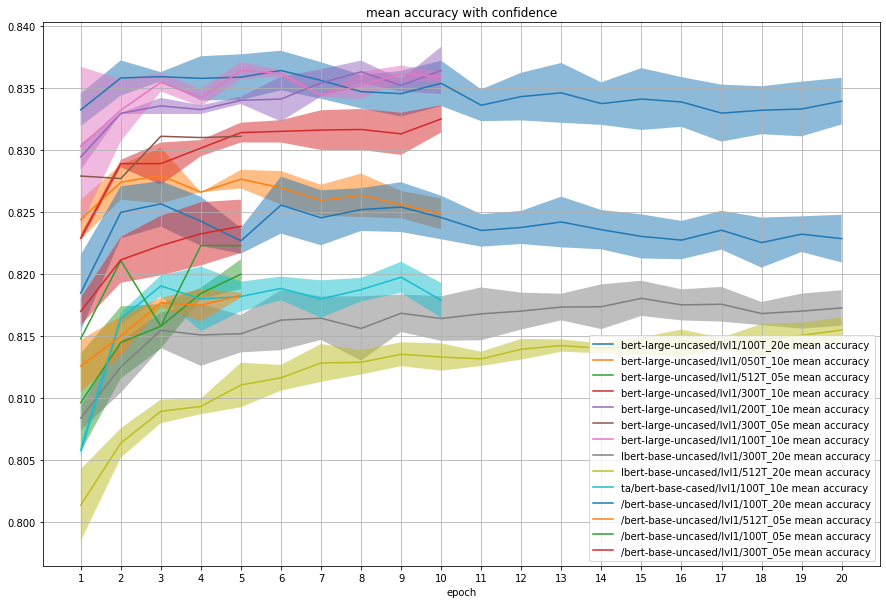

In [131]:
plt.figure(figsize=(15,10))

for res in reults:
    x=range(1,len(res[1])+1)
    plt.plot(x,res[3], label="{} mean accuracy".format(res[0]))
    plt.fill_between(x, res[3]-res[4], res[3]+res[4], alpha=0.5)
plt.xlabel("epoch")
plt.legend()
plt.grid()
plt.xticks(range(1,21))
plt.title("mean accuracy with confidence")
plt.savefig('./visualizations/accu_graph.png', dpi=fig.dpi)

plt.show()

In [77]:
df=pd.DataFrame([[res[0][res[0].find("b"):res[0][res[0].find("b"):].find("/")+res[0].find("b")], res[0][res[0].find("lvl1")+5:res[0].find("T")],res[0][res[0].find("T")+2:-1], res[1][-1], res[3][-1]] for res in reults], columns=['model','token', 'epochs', 'f1','acc'])

In [108]:
df=df.round(4)
df=df.sort_values(by=['token', 'epochs'])
df['time per epoch (s)']=[320,160,650,177,687,189,1221,2068,605,2334,291,3709,1006, 551 ]
df['time per epoch (m)']=(df['time per epoch (s)']/60).round(2)
df['f1 per second']=((df.f1*100)/df['time per epoch (s)']).round(4)
df

,model,token,epochs,f1,acc,time per epoch (s),f1 per second,time per epoch (m)
1,bert-large-uncased,050,10,0.8145,0.8248,320,0.2545,5.33
12,bert-base-uncased,100,05,0.8111,0.8223,160,0.5069,2.67
6,bert-large-uncased,100,10,0.8277,0.8359,650,0.1273,10.83
9,bert-base-cased,100,10,0.8080,0.8179,177,0.4565,2.95
0,bert-large-uncased,100,20,0.8248,0.8339,687,0.1201,11.45
10,bert-base-uncased,100,20,0.8133,0.8229,189,0.4303,3.15
4,bert-large-uncased,200,10,0.8283,0.8364,1221,0.0678,20.35
5,bert-large-uncased,300,05,0.8230,0.8311,2068,0.0398,34.47
13,bert-base-uncased,300,05,0.8148,0.8238,605,0.1347,10.08
3,bert-large-uncased,300,10,0.8230,0.8325,2334,0.0353,38.90


In [113]:
df=df.drop(['time per epoch (s)'], axis=1)

In [119]:
df_best=df.sort_values(by=['f1', 'acc'], ascending=False)
print(df_best.to_markdown()) 


|    | model              |   token |   epochs |     f1 |    acc |   f1 per second |   time per epoch (m) |
|---:|:-------------------|--------:|---------:|-------:|-------:|----------------:|---------------------:|
|  4 | bert-large-uncased |     200 |       10 | 0.8283 | 0.8364 |          0.0678 |                20.35 |
|  6 | bert-large-uncased |     100 |       10 | 0.8277 | 0.8359 |          0.1273 |                10.83 |
|  0 | bert-large-uncased |     100 |       20 | 0.8248 | 0.8339 |          0.1201 |                11.45 |
|  3 | bert-large-uncased |     300 |       10 | 0.823  | 0.8325 |          0.0353 |                38.9  |
|  5 | bert-large-uncased |     300 |       05 | 0.823  | 0.8311 |          0.0398 |                34.47 |
| 13 | bert-base-uncased  |     300 |       05 | 0.8148 | 0.8238 |          0.1347 |                10.08 |
|  1 | bert-large-uncased |     050 |       10 | 0.8145 | 0.8248 |          0.2545 |                 5.33 |
| 10 | bert-base-uncased  | 

In [120]:
df_fast=df.sort_values(by=['f1 per second'], ascending=False)
print(df_fast.to_markdown()) 


|    | model              |   token |   epochs |     f1 |    acc |   f1 per second |   time per epoch (m) |
|---:|:-------------------|--------:|---------:|-------:|-------:|----------------:|---------------------:|
| 12 | bert-base-uncased  |     100 |       05 | 0.8111 | 0.8223 |          0.5069 |                 2.67 |
|  9 | bert-base-cased    |     100 |       10 | 0.808  | 0.8179 |          0.4565 |                 2.95 |
| 10 | bert-base-uncased  |     100 |       20 | 0.8133 | 0.8229 |          0.4303 |                 3.15 |
|  7 | bert-base-uncased  |     300 |       20 | 0.8077 | 0.8173 |          0.2776 |                 4.85 |
|  1 | bert-large-uncased |     050 |       10 | 0.8145 | 0.8248 |          0.2545 |                 5.33 |
|  8 | bert-base-uncased  |     512 |       20 | 0.8053 | 0.8155 |          0.1462 |                 9.18 |
| 13 | bert-base-uncased  |     300 |       05 | 0.8148 | 0.8238 |          0.1347 |                10.08 |
|  6 | bert-large-uncased | 